# Task 6.4: Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Cleaning and wrangling of the data
#### 3. Data preparation for regression analysis
#### 3. Regression analysis

### 1. Importing libraries

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [280]:
# This option ensures charts or graphs created are displayed within notebook without the need to "call" specifically

%matplotlib inline

In [281]:
# Creating path

path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6'

In [282]:
# Importing the project's data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Gun_violence_Data_cleaned.csv'))

In [283]:
pd.set_option ('display.max_columns', None)
df.head()

,incident_id,date,Date4,state,city_or_county,address,number_killed,number_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,number_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,state_house_district,state_senate_district
0,461105,01/01/2013,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured|Mass Shooting (4+ victi...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male|1, Male|3, Male|4, Female","0, Julian Sims","0, Arrested|1, Injured|2, Injured|3, Injured|4...","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",NaN,NaN
1,460726,01/01/2013,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured|Shot - Dead (murder, ac...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male","0, Bernard Gillis","0, Killed|1, Injured|2, Injured|3, Injured","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",62.0,35.0
2,478855,01/01/2013,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,"0, Unknown|1, Unknown","0, Unknown|1, Unknown","Shot - Wounded/Injured|Shot - Dead (murder, ac...",41.4455,Cotton Club,-82.1377,2.0,NaN,"0, 25|1, 31|2, 33|3, 34|4, 33","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male|1, Male|2, Male|3, Male|4, Male","0, Damien Bell|1, Desmen Noble|2, Herman Seage...","0, Injured, Unharmed, Arrested|1, Unharmed, Ar...","0, Subject-Suspect|1, Subject-Suspect|2, Victi...",56.0,13.0
3,478925,05/01/2013,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)|Offi...",39.6518,NaN,-104.8020,NaN,NaN,"0, 29|1, 33|2, 56|3, 33","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Female|1, Male|2, Male|3, Male","0, Stacie Philbrook|1, Christopher Ratliffe|2,...","0, Killed|1, Killed|2, Killed|3, Killed","0, Victim|1, Victim|2, Victim|3, Subject-Suspect",40.0,28.0
4,478959,07/01/2013,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,"0, Unknown|1, Unknown","0, Handgun|1, Handgun","Shot - Wounded/Injured|Shot - Dead (murder, ac...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,"0, 18|1, 46|2, 14|3, 47","0, Adult 18+|1, Adult 18+|2, Teen 12-17|3, Adu...","0, Female|1, Male|2, Male|3, Female","0, Danielle Imani Jameison|1, Maurice Eugene E...","0, Injured|1, Injured|2, Killed|3, Killed","0, Victim|1, Victim|2, Victim|3, Subject-Suspect",62.0,27.0


In [284]:
df.isnull().sum()

incident_id                         0
date                                0
Date4                               0
state                               0
city_or_county                      0
address                             0
number_killed                       0
number_injured                      0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
number_guns_involved            99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_status              27626
participant_type                24863
state_house_

In [285]:
df.shape

(239677, 28)

### 2. Cleaning and wrangling of the data

#### Data wrangling

In [286]:
df.columns

Index(['incident_id', 'date', 'Date4', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [287]:
# Dropping totally unnecessary columns to work with by selecting just the following:

columns = [
           "Date4",
           "state",
           "city_or_county",
           "number_killed",
           "number_injured"
          ]

In [288]:
# Creating a subset

df_sub = df[columns]

In [289]:
df_sub.head()

,Date4,state,city_or_county,number_killed,number_injured
0,2013-01-01,Pennsylvania,Mckeesport,0,4
1,2013-01-01,California,Hawthorne,1,3
2,2013-01-01,Ohio,Lorain,1,3
3,2013-01-05,Colorado,Aurora,4,0
4,2013-01-07,North Carolina,Greensboro,2,2


In [290]:
df_sub.shape

(239677, 5)

In [291]:
# Renaming Date4 column

df_sub = df_sub.rename(columns={'Date4': 'date'})

In [292]:
df_sub.head()

,date,state,city_or_county,number_killed,number_injured
0,2013-01-01,Pennsylvania,Mckeesport,0,4
1,2013-01-01,California,Hawthorne,1,3
2,2013-01-01,Ohio,Lorain,1,3
3,2013-01-05,Colorado,Aurora,4,0
4,2013-01-07,North Carolina,Greensboro,2,2


### Consistency checks

#### Missing values

In [293]:
df_sub.isnull().sum()

# Subset has no missing values

date              0
state             0
city_or_county    0
number_killed     0
number_injured    0
dtype: int64

#### Checking duplicates

In [294]:
dups = df_sub.duplicated()

In [295]:
dups.shape  # No duplicates

(239677,)

#### Checking extreme values

In [296]:
sns.distplot(df_sub['number_killed'], bins=25)  # No extreme values

C:\Users\terry\AppData\Local\Temp\ipykernel_16504\1855168393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['number_killed'], bins=25)  # No extreme values


<Axes: xlabel='number_killed', ylabel='Density'>

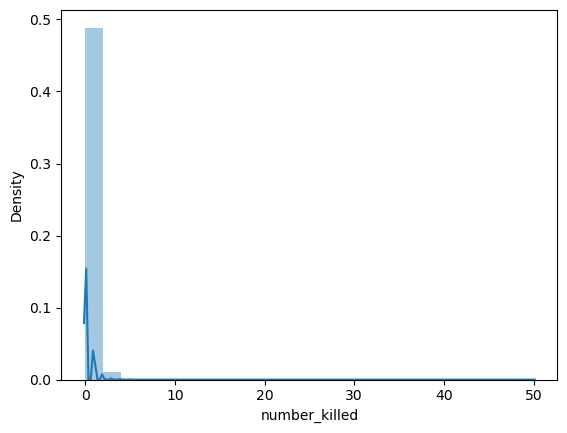

In [297]:
plt.show()

In [298]:
df_sub['number_killed'].mean()  # Checking the mean 

0.25228953967214207

In [299]:
df_sub['number_killed'].median()  # Checking the median 

0.0

In [300]:
df_sub['number_killed'].max()  # Checking the max

50

## Project Hypothesis: 
Despite certain states having high gun violence victims, it is not possible to predict how many people will die of gun violence in the nearest future. 

### 3. Data preparation for regression analysis

In [301]:
# Extracting additional time-based features to make data fully prepared for analysis

df_sub['date'] = pd.to_datetime(df['date'], dayfirst=True)

df_sub['year'] = df_sub['date'].dt.year
df_sub['month'] = df_sub['date'].dt.month
df_sub['day'] = df_sub['date'].dt.day

In [302]:
df_sub.head()

,date,state,city_or_county,number_killed,number_injured,year,month,day
0,2013-01-01,Pennsylvania,Mckeesport,0,4,2013,1,1
1,2013-01-01,California,Hawthorne,1,3,2013,1,1
2,2013-01-01,Ohio,Lorain,1,3,2013,1,1
3,2013-01-05,Colorado,Aurora,4,0,2013,1,5
4,2013-01-07,North Carolina,Greensboro,2,2,2013,1,7


In [303]:
df_sub.isnull().sum()

date              0
state             0
city_or_county    0
number_killed     0
number_injured    0
year              0
month             0
day               0
dtype: int64

In [307]:
df_sub.dtypes

date              datetime64[ns]
state                     object
city_or_county            object
number_killed              int64
number_injured             int64
year                       int32
month                      int32
day                        int32
dtype: object

In [310]:
# Creating a scatterplot using matplotlib for another look at how chosen variables plot against each other

df_sub.plot(x = 'number_killed', y='number_injured', style='o')
plt.title('Number of people killed per year')
plt.xlabel('number_killed')
plt.ylabel('number_injured')

Text(0, 0.5, 'number_injured')

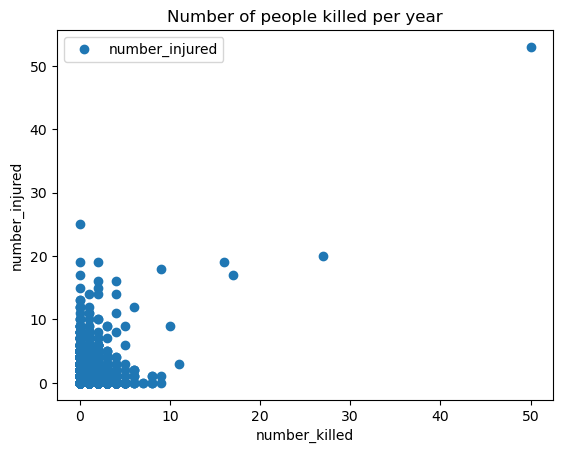

In [311]:
plt.show()

In [312]:
# Reshaping the variable into Numpy arrays and putting them into separate objects

X = df_sub['number_killed'].values.reshape(-1,1)
y = df_sub['number_injured'].values.reshape(-1,1)

In [313]:
X

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [314]:
y

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [315]:
# Splitting the data into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [316]:
# Creating a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [317]:
# creating a regression object

regression.fit(X_train, y_train)

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

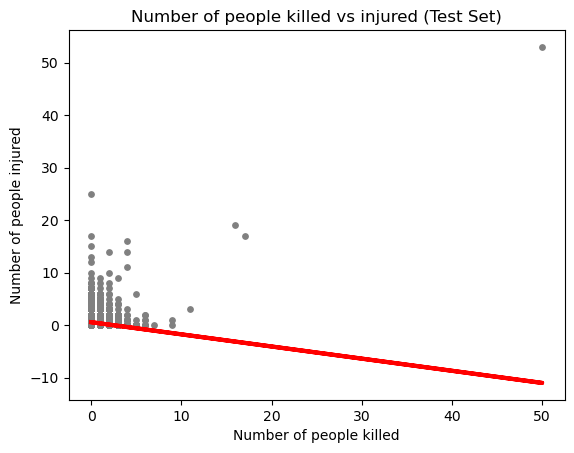

In [322]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of people killed vs injured (Test Set)')
plot_test.xlabel('Number of people killed')
plot_test.ylabel('Number of people injured')
plot_test.show()

In [320]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [321]:
# Printing the model summary statistics. This is where the performance of the model is evaluated.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.23138944]]
Mean squared error:  0.5782445419147914
R2 score:  -0.012666493648215704


An R2 score  of -0.01266 indicates that the regression model performs worst than a simple horizontal line at the mean of the independent variable. This negative value fails to capture any meaningful relationship between the independent and the dependent variable. The model's predictions are slightly worst than simply predicting the mean of the dependent variable for all cases. The possible reason for this poor model fit I strongly believe, is the fact the chosen variable, namely "number_killed" is not relevant as an independent variable. Perhaps considering "number_killed" as a dependent variable and chosing another variable - say "state" as an independent variable could result in a better model fit.

### Making "state" an independent variable and performing a new regression analysis

### Preparation of data

In [355]:
# Aggregating the number_killed by state

state_data = df_sub.groupby("state").agg({
    'number_killed': 'sum',
    'number_injured': 'sum',
}).reset_index()

In [356]:
# Checking state_data

state_data.head()

,state,number_killed,number_injured
0,Alabama,1880,2998
1,Alaska,267,325
2,Arizona,1094,1096
3,Arkansas,773,1347
4,California,5562,7644


In [357]:
# Sorting number of victims killed per state from 2013 to 2018 in descending order

state_data_sorted = state_data.sort_values(by='number_killed', ascending=False)
state_data_sorted.reset_index(drop=True, inplace=True)
state_data_sorted

,state,number_killed,number_injured
0,California,5562,7644
1,Texas,5046,6106
2,Florida,3909,7072
3,Illinois,3409,13514
4,Ohio,2508,5703
5,Georgia,2456,4056
6,Pennsylvania,2395,5056
7,North Carolina,2225,4629
8,Louisiana,2179,4398
9,Missouri,2136,3585


In [358]:
# Selecting top_ states by number_killed

df_top10 = state_data_sorted.head(10)

In [359]:
df_top10

,state,number_killed,number_injured
0,California,5562,7644
1,Texas,5046,6106
2,Florida,3909,7072
3,Illinois,3409,13514
4,Ohio,2508,5703
5,Georgia,2456,4056
6,Pennsylvania,2395,5056
7,North Carolina,2225,4629
8,Louisiana,2179,4398
9,Missouri,2136,3585


Using a state name as an independent variable requires converting it into a numerical format because machine learning models cannot process categorical data

##### Using One-Hot Encoding 

In [360]:
print(df_top10.columns)

Index(['state', 'number_killed', 'number_injured'], dtype='object')


In [364]:
df_top10_encoded = pd.get_dummies(df_top10, columns=['state'])

In [365]:
# Checking data subset with dummies
df_top10_encoded

,number_killed,number_injured,state_California,state_Florida,state_Georgia,state_Illinois,state_Louisiana,state_Missouri,state_North Carolina,state_Ohio,state_Pennsylvania,state_Texas
0,5562,7644,True,False,False,False,False,False,False,False,False,False
1,5046,6106,False,False,False,False,False,False,False,False,False,True
2,3909,7072,False,True,False,False,False,False,False,False,False,False
3,3409,13514,False,False,False,True,False,False,False,False,False,False
4,2508,5703,False,False,False,False,False,False,False,True,False,False
5,2456,4056,False,False,True,False,False,False,False,False,False,False
6,2395,5056,False,False,False,False,False,False,False,False,True,False
7,2225,4629,False,False,False,False,False,False,True,False,False,False
8,2179,4398,False,False,False,False,True,False,False,False,False,False
9,2136,3585,False,False,False,False,False,True,False,False,False,False


In [366]:
# Converting True/False to Binary (1/0)

df_top10_encoded = df_top10_encoded.astype(int)

In [367]:
df_top10_encoded

,number_killed,number_injured,state_California,state_Florida,state_Georgia,state_Illinois,state_Louisiana,state_Missouri,state_North Carolina,state_Ohio,state_Pennsylvania,state_Texas
0,5562,7644,1,0,0,0,0,0,0,0,0,0
1,5046,6106,0,0,0,0,0,0,0,0,0,1
2,3909,7072,0,1,0,0,0,0,0,0,0,0
3,3409,13514,0,0,0,1,0,0,0,0,0,0
4,2508,5703,0,0,0,0,0,0,0,1,0,0
5,2456,4056,0,0,1,0,0,0,0,0,0,0
6,2395,5056,0,0,0,0,0,0,0,0,1,0
7,2225,4629,0,0,0,0,0,0,1,0,0,0
8,2179,4398,0,0,0,0,1,0,0,0,0,0
9,2136,3585,0,0,0,0,0,1,0,0,0,0


Making sure the feature matrix (With the binary State columns) and the target variable are aligned properly

In [447]:
df_new = pd.DataFrame(df_top10_encoded)

In [448]:
X = df_new.drop(columns=['number_killed', 'number_injured'])
y = df_new['number_killed']

In [449]:
print(X.shape)
print(y.shape)

(10, 10)
(10,)


In [450]:
# Splitting the data into training and testing sets (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [451]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shpae:", y_test.shape)

X_train shape: (7, 10)
y_train shape: (7,)
X_test shape: (3, 10)
y_test shpae: (3,)


### Regression analysis part 2

In [452]:
# Creating and training the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [478]:
# Evaluating the model

rmse = mean_squared_error(y_test,y_predicted)
r2 = r2_score(y_test, y_predicted)

In [479]:
# Displaying results

print('Slope:' ,regression.coef_)
print("Mean Squared Error:", rmse)
print("R-squared:", r2)

Slope: [[-0.23138944]]
Mean Squared Error: 767955.5170068027
R-squared: -0.36486548484584214


In [480]:
y_predicted

array([3318.42857143, 3318.42857143, 3318.42857143])

In [481]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test, 'predicted':y_predicted.flatten()})
data.head() # Based on 30% test set

,Actual,predicted
2,3909,3318.428571
8,2179,3318.428571
4,2508,3318.428571


#### Comparing how the regression fits the Training vs Test Set

As I did mention in the first regression analysis while using different variables, a negative R2 score fails to show any meaningful relationship between the states and the number of deaths and injured gun violence victims. Despite some states having higher casualties than others, there is no indication that there is a correlation between a state's name and the number of gun violence victims to be expected. Since the model is performing worse than a simple average, it doesn't make sense to compare the regression fit using the R2 score. The negative R2 value also validates my research hypothesis which stated a prediction in gun violence victims is nearly impossible. At the very least, we do not have enough data to accurately lead the analysis towards another conclusion. 